In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
Lfinalm = pd.read_csv('LGeoxc.csv')

In [3]:
Lfinalm.head(5)

,Neighborhood,Asian Restaurant,Bakery,Bar,Beer Bar,Bookstore,Boutique,Breakfast Spot,Brewery,Bus Stop,...,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Cluster Labels
0,Abbey Wood,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,2
1,Acton,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2
2,Aldgate,2,2,0,2,1,0,0,0,0,...,0,1,1,0,0,2,0,0,2,0
3,Aldwych,0,2,0,0,1,1,0,0,0,...,0,1,1,1,0,0,0,0,1,0
4,Anerley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [4]:
#Lfinalm.info

In [5]:
Lfinalm['Cluster Labels'].value_counts()

4    161
2     50
3     38
0     37
1     21
Name: Cluster Labels, dtype: int64

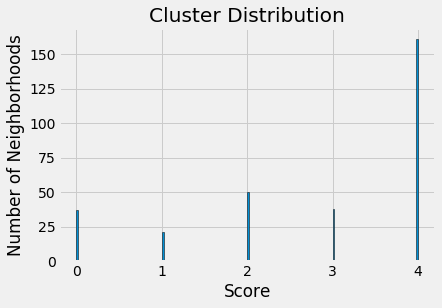

In [6]:
import matplotlib.pyplot as plt

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(Lfinalm['Cluster Labels'].dropna(), bins = 200, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Neighborhoods'); 
plt.title('Cluster Distribution');

In [7]:
# Find all correlations with the score and sort

correlations_data = Lfinalm.corr()['Cluster Labels'].sort_values()
correlations_data

Hotel                           -0.395908
Garden                          -0.280465
Boutique                        -0.152005
Chinese Restaurant              -0.114994
Bus Stop                        -0.085708
French Restaurant               -0.071981
Italian Restaurant              -0.041244
Train Station                   -0.031855
Grocery Store                   -0.026305
Asian Restaurant                -0.016174
Tapas Restaurant                -0.005104
Indian Restaurant                0.009746
Greek Restaurant                 0.012736
Japanese Restaurant              0.027825
Cocktail Bar                     0.036911
Wine Bar                         0.040463
Middle Eastern Restaurant        0.049674
Sushi Restaurant                 0.061787
Gift Shop                        0.068045
Fish & Chips Shop                0.073121
Vegetarian / Vegan Restaurant    0.094119
Gym                              0.097614
Korean Restaurant                0.101961
Breakfast Spot                   0

In [8]:
# Lets define feature sets - split up dataset into inputs (X) and target (y). Input will be every column except
# ‘cluster labes ’ because ‘cluster labels’ is what we will be attempting to predict.

Lfinalm.columns.tolist()

['Neighborhood',
 'Asian Restaurant',
 'Bakery',
 'Bar',
 'Beer Bar',
 'Bookstore',
 'Boutique',
 'Breakfast Spot',
 'Brewery',
 'Bus Stop',
 'Cafe',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Convenience Store',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'French Restaurant',
 'Garden',
 'Gastropub',
 'Gift Shop',
 'Greek Restaurant',
 'Grocery Store',
 'Gym',
 'Gym / Fitness Center',
 'Hotel',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Middle Eastern Restaurant',
 'Park',
 'Pharmacy',
 'Pizza Place',
 'Portuguese Restaurant',
 'Pub',
 'Sandwich Place',
 'Supermarket',
 'Sushi Restaurant',
 'Tapas Restaurant',
 'Thai Restaurant',
 'Train Station',
 'Turkish Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant',
 'Wine Bar',
 'Cluster Labels']

In [9]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array (without y) :

X = Lfinalm[[
 'Asian Restaurant',
 'Bakery',
 'Bar',
 'Beer Bar',
 'Bookstore',
 'Boutique',
 'Breakfast Spot',
 'Brewery',
 'Bus Stop',
 'Cafe',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Convenience Store',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'French Restaurant',
 'Garden',
 'Gastropub',
 'Gift Shop',
 'Greek Restaurant',
 'Grocery Store',
 'Gym',
 'Gym / Fitness Center',
 'Hotel',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Middle Eastern Restaurant',
 'Park',
 'Pharmacy',
 'Pizza Place',
 'Portuguese Restaurant',
 'Pub',
 'Sandwich Place',
 'Supermarket',
 'Sushi Restaurant',
 'Tapas Restaurant',
 'Thai Restaurant',
 'Train Station',
 'Turkish Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant',
 'Wine Bar']] .values  #.astype(float)
X[0:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  2,  0,  2,  1,  0,  0,  0,  0,  1,  0,  0,  6,  9,  0,  1,
         0,  2,  2,  0,  0,  1,  0,  0,  3, 10,  1,  2,  2,  0,  1,  1,
         0,  2,  1,  2,  1,  0,  1,  1,  0,  0,  2,  0,  0,  2],
       [ 0,  2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  2,  4,  5,  0,  0,
         0,  2,  1,  0,  1,  0,  0,  0,  1,  4,  2,  3,  2,  1,  0,  2,
         0,  1,  0,  3,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0, 

In [10]:
# ‘cluster labes’ will be the target.

y = Lfinalm['Cluster Labels'].values
y[0:5]

array([2, 2, 0, 0, 3])

In [11]:
# Normalize Data
# Data Standardization give data zero mean and unit variance, it is good practice,
# especially for algorithms such as KNN which is based on distance of cases:

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.454255  , -0.62466871, -0.49371472, -0.32511532, -0.48248985,
        -0.16908747, -0.45637798, -0.26003804, -0.55653119, -0.90010015,
        -0.50049228, -0.40253526, -0.38411249, -0.49406718,  1.05138021,
        -0.58542845, -0.40428181, -0.39598167, -0.3673122 , -0.45397424,
        -0.34639573, -0.30277167, -0.9531045 , -0.42851806, -0.65130109,
        -0.50261479, -0.65354536, -0.67621363, -0.4419276 , -0.28362375,
        -0.46161811, -0.81279167, -0.49229678, -0.73540311, -0.4169103 ,
        -1.00246046, -0.54941141,  2.36425477, -0.40770749, -0.36234973,
        -0.43876669,  1.89716919, -0.52147841, -0.27525397, -0.3772761 ,
        -0.33136942],
       [-0.454255  , -0.62466871, -0.49371472, -0.32511532, -0.48248985,
        -0.16908747,  1.76755914, -0.26003804, -0.55653119, -0.90010015,
        -0.50049228, -0.40253526, -0.38411249, -0.92013072,  1.05138021,
        -0.58542845, -0.40428181, -0.39598167, -0.3673122 , -0.45397424,
        -0.34639573, -0.30277

In [12]:
# Use Scikit-learn function to split dataset into training and testing data.
# Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
# Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (214, 46) (214,)
Test set: (93, 46) (93,)


In [13]:
#Import library
#Classifier implementing the k-nearest neighbors vote.

from sklearn.neighbors import KNeighborsClassifier

In [14]:
#Training
#Lets start the algorithm:

k = 4

# Build and Train Model and Predict 
# Create KNN classifier
# To train the model we will use the ‘fit’ function and pass in our training data as parameters to fit our model
# to the training data.

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)


neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [15]:
# Predicting - use the model to predict the test set:
# Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.

yhat = neigh.predict(X_test)
yhat[0:5]

# show first 5 model predictions on the test data

array([4, 0, 4, 3, 2])

In [16]:
# Accuracy evaluation
# In multilabel classification, accuracy classification score is a function that computes subset accuracy.
# This function is equal to the jaccard_similarity_score function. 
# Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.794392523364486
Test set Accuracy:  0.5806451612903226


In [17]:
#K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User.
#So, how can we choose right value for K? The general solution is to reserve a part of your data for testing
#the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy 
#of prediction using all samples in your test set. Repeat this process, increasing the k, and see which
#k is the best for your model.

#We can calculate the accuracy of KNN for different Ks.

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5483871 , 0.51612903, 0.5483871 , 0.58064516, 0.53763441,
       0.53763441, 0.51612903, 0.5483871 , 0.52688172])

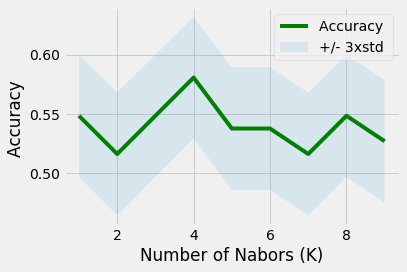

In [18]:
#Plot model accuracy for Different number of Neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [19]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5806451612903226 with k= 4


In [20]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

array([[-2.15628964,  0.13399838],
       [ 4.51845698,  2.28201713],
       [-2.38563397,  1.08390875],
       [-0.69995158, -0.08367689],
       [-1.56458646, -1.02307429]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [22]:
y_predict = knn_model.predict(X_test)
y_predict

array([4, 4, 0, 2, 2, 4, 4, 4, 2, 2, 0, 3, 4, 1, 4, 2, 4, 4, 4, 0, 4, 4,
       4, 4, 2, 4, 0, 2, 4, 4, 0, 3, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 0, 4,
       3, 4, 4, 3, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 3, 4, 4, 4, 1, 2, 2, 3,
       4, 1, 4, 4, 2, 1, 4, 4, 4, 0, 2, 4, 4, 2, 3, 3, 4, 4, 4, 2, 0, 2,
       2, 2, 3, 1, 3])

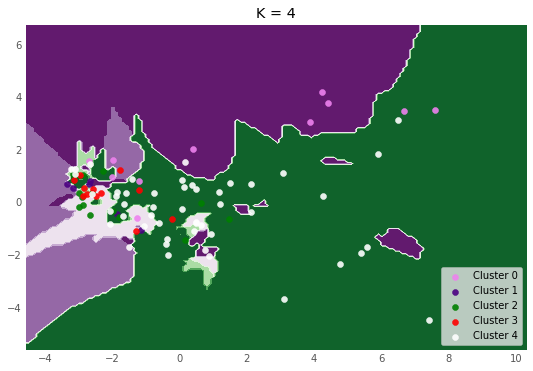

In [23]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'green', 3: 'red', 4: 'white'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.9, 
                label='Cluster {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

The train-test-split method we used in earlier is called ‘holdout’. Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable.

To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [46]:
#from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=k)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:  {}  ".format(np.mean(cv_scores)))

[0.625      0.59677419 0.62295082 0.6        0.65      ]
cv_scores mean:  0.6189450026441036  


Using cross-validation, our mean score is about 61.89%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

Create and Train the Model Here we create a KNN Object and use the .fit() method to train the model. Upon completion of the model we should receive confirmation that the training has been completed

In [47]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighbors -> argument identifies the amount of neighbors used to ID classification
knn = KNeighborsClassifier(n_neighbors=4)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
Make Predictions Here we review where our model was accurate and where it misclassified elements.

In [48]:
 #Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(X_test)

# Review the predictions
pred

array([4, 4, 0, 2, 2, 4, 4, 4, 2, 2, 0, 3, 4, 1, 4, 2, 4, 4, 4, 0, 4, 4,
       4, 4, 2, 4, 0, 2, 4, 4, 0, 3, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 0, 4,
       3, 4, 4, 3, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 3, 4, 4, 4, 1, 2, 2, 3,
       4, 1, 4, 4, 2, 1, 4, 4, 4, 0, 2, 4, 4, 2, 3, 3, 4, 4, 4, 2, 0, 2,
       2, 2, 3, 1, 3])


Evaluate the predictions Evaluate the Model by reviewing the classification report or confusion matrix. By reviewing these tables, we are able to evaluate how accurate our model is with new values.



In [49]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Print out classification report and confusion matrix
# Classification Report -> This tells us our model was 53-61% accurate…

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.12      0.17      0.14         6
           2       0.26      0.33      0.29        15
           3       0.30      0.25      0.27        12
           4       0.69      0.67      0.68        49

    accuracy                           0.49        93
   macro avg       0.38      0.36      0.36        93
weighted avg       0.51      0.49      0.50        93



In [51]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 4
FP - False Positive 1
FN - False Negative 2
TP - True Positive 1
Accuracy Rate: 0.053763440860215055
Misclassification Rate: 0.03225806451612903


In [44]:
# Generate function to add error rates of KNN with various k-values
# error_rate -> empty list to gather error rates at various k-values
# for loop -> loops through k values 1 to 39
# knn -> creates instance of KNeighborsClassifier with various k
# knn.fit -> trains the model
# pred_i -> conducts predictions from model on test subset
# error_rate.append -> adds error rate of model with various k-value, using the average where prediction not
# equal to the test values
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

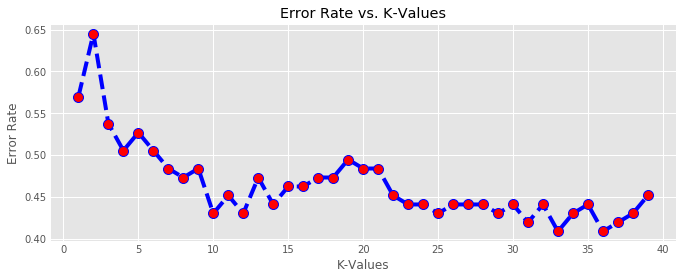

In [45]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')